Testing the programwith the M8190A AWG


# All settings will be given to the channel 1 output, in the DC Amp out configuration

In [70]:
%matplotlib inline 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
#Importing the functions from the module
from Sweeping1 import sweep0, Sweep

# Visa interface for the M8190A instrument:

In [2]:
import pyvisa as visa
rm = visa.ResourceManager()
print(rm.list_resources())

()


In [3]:
M8190A = rm.open_resource('TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR')
M8190A.read_termination = '\n'
M8190A.write_termination = '\n'
M8190A.query('*IDN?')

In [4]:
print(M8190A)

TCPIPInstrument at TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR


In [5]:
M8190A.query("*IDN?")

'Agilent Technologies,M8190A,MY57701776,5.6.0.0-2\n'

In [5]:
M8190A.read_termination = '\n'
M8190A.write_termination = '\n'
M8190A.query('*IDN?')

'Agilent Technologies,M8190A,MY57701776,5.6.0.0-2'

## Instrument Initialitaion

In [ ]:
M8190A.write('INST:COUP:STAT 0') #Decoupling the channels
M8190A.write('OUTP1:ROUT DC') #setting the output to DC 
M8190A.write('OUTP1 ON') #activating the output "Amp Out"

# Instrument Settings

CSF = Clock  Sampling Frecuency

In [2]:
M8190A_S1={
    'Amplitude':300,
    'CSF':925000000,
}

In [11]:
def InstSet(Setts):

    "Setting the instumets Votlage Amplitude and Sampling frequency, given the parameters stablished in the Setts dictionary"

    #Taking the value in milivolts from the dictionary, sets it properly in the instument. Must be within the proper interval 
    volt = Setts['Amplitude']/1000
    M8190A.write('DC1:VOLT:AMPL volt')

    #The sample frequency is now set to the specific value given in the Dictionary
    sf = Setts['CSF']
    M8190A.write('FREQ:RAST sf')



    


In [ ]:
M8190A.query('FREQ:RAST?') 

In [31]:
M8190A.write('DC1:VOLT:AMPL 0.3') #Setting voltage amplitude to 300mlv search query version to check everything works

18

# Misc. SCPI commands

In [87]:
M8190A.query('*OPC?') #this is for checking that the previous commands were completed

'1'

In [14]:
M8190A.write('*CLS')

5

In [27]:
M8190A.write('*RST') #Reseting the instrument to factory settings

5

In [98]:
M8190A.write('TRAC1:DEL:ALL') #Delets the stored sequences in the instrument

14

In [ ]:
M8190A.write('ABOR') #self explanatory

# Pulses

Time is given in seconds, Amplitude is Voltage in milivolts.

In [5]:
Rabi={
    'Amplitude':200,
    'Start time':1e-10,
    'End time':2e-10,
    'Start Duration':5,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

In [6]:
Probe1={
    'Amplitude':50,
    'Start time':5,
    'End time':20,
    'Start Duration':7,
    'End Duration':9 ,
    'Sweep time':1,
    'Sweep Duration':0
}

In [7]:
Probe2={
    'Amplitude':150,
    'Start time':16,
    'End time':21,
    'Start Duration':4,
    'End Duration':9,
    'Sweep time':1,
    'Sweep Duration':1
}

In [8]:
Probe3={
    'Amplitude':5,
    'Start time':5,
    'End time':10,
    'Start Duration':1,
    'End Duration':5,
    'Sweep time':1,
    'Sweep Duration':0
}

In [3]:
PulsoG={
    'Amplitude':200,
    'Start time':1e-10,
    'End time':9,
    'Start Duration':7,
    'End Duration':6 ,
    'Sweep time':0,
    'Sweep Duration':0
}

## Pulse schemes = Lists of the dictionaries

In [9]:
Pulses_List3 = [
    Rabi, Probe1, Probe2
    ];


Pulses_List = [
    Rabi,Probe1
    ]  ;



Pulses_List2 = [
    Rabi,Probe2
    ];

PScheme=[
    PulsoG
    ]

## Testing

In [10]:
pg, ti = Sweep(PScheme,10,0,10,72000)
pulGnvm = pg/M8190A_S1['Amplitude']
np.savetxt("PulsG.csv",pulGnvm, delimiter = ",")

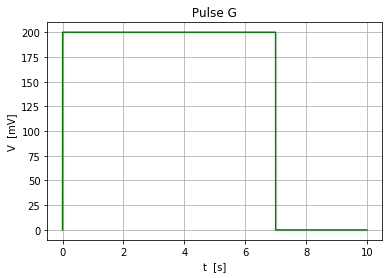

In [11]:
fig,ax= plt.subplots()

ax.grid(True)
plt.plot(ti,pg,'-g')
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
ax.set_title(' Pulse G ')
#ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [35]:
PScheme

[{'Amplitude': 200,
  'Start time': 1e-10,
  'End time': 9,
  'Start Duration': 7,
  'End Duration': 6,
  'Sweep time': 0,
  'Sweep Duration': 0}]

# Sending the Pulse information to the instrume to the instrument

In [98]:
M8190A.write('TRAC1:DEL:ALL') #Delets the stored sequences in the instrument

14

In [37]:
M8190A.write('TRAC1:IQIM 1, "C:\\Users\\a.hernandez.de.la.ve\\Documents\\GitHub\\STM\\M8190\\PulsG.csv", CSV, BOTH, ON, ALEN')

104

In [38]:
M8190A.query(':TRAC1:CAT?') #catalogue of the corresponding traces stored in memory

'2,72000'

In [25]:
M8190A.write('TRAC1:SEL 1')

12

In [40]:
M8190A.write('INIT:IMM')

9

In [42]:
M8190A.write('ABOR')

5

### Animation

In [22]:
%matplotlib notebook
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(-1, 32), ylim=(0, 11))
ax.grid(True)
ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [s]')
line, = ax.plot([], [], color='black')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  Whe iterate over n and define the stopping point by the end value of frames in the anim function
def animate(i):
    y, time = Sweep(Pulses_List,100,i,32,1000)
    line.set_data(time, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.linspace(0,100), interval=400, blit=True)
plt.show()

#in our case, frames should match to the total number of time steps N

<IPython.core.display.Javascript object>

## To Do:
1. Code a "Rescale voltage program" to the obtain the dserided pulse amplitude by the given voltage output of the instrument. $\checkmark$
2. Calculate the  $\Delta \tau$ and study it's relation with the sample size and sampling rate, code this relation so we can get this parameters by any given  $\Delta \tau$. Partly $\checkmark$
3. Rewrite the code, adding a dictionary for the settings of the instrument, the renormalization of the Voltage $\checkmark$ and putting the pulse function in terms of $\Delta \tau$ and t